# Read mnist, try basic operations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [76]:
class Const:
    """All constants collected together."""
    nrows = 28
    nclasses = 10
    
C = Const()

In [107]:
(xtrain,ytrain), (xtest,ytest) = tf.keras.datasets.mnist.load_data()

def scale_mnist(x):
    x  = x.astype('float32')/255
    x = np.expand_dims(x,3) # Weird extra axis for channels, to make keras work
    return x
    
xtrain = scale_mnist(xtrain)
xtest  = scale_mnist(xtest)

ytrain = tf.keras.utils.to_categorical(ytrain, C.nclasses)
ytest  = tf.keras.utils.to_categorical(ytest, C.nclasses)

In [108]:
print(np.max(xtrain[1,:,:,0]) )
print(xtrain.shape)

1.0
(60000, 28, 28, 1)


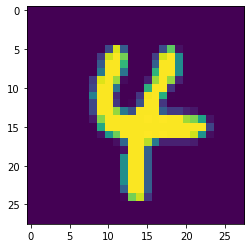

In [110]:
plt.imshow(xtrain[np.random.randint(xtrain.shape[0]),:,:,0]);

In [136]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(C.nrows,C.nrows,1)), # Universal input layer
        #tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(C.nrows,C.nrows,1))
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(C.nclasses, activation='softmax')
    ])
    
    optimizer = tf.keras.optimizers.Adadelta(learning_rate=1)

    model.compile(loss='categorical_crossentropy',
                 optimizer=optimizer,
                 metrics=['accuracy'])
    
    return model

model = build_model()
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________



 0.65 0.35 0.32 0.30 0.29 0.28 0.28 0.28 0.27 0.27
 0.27 0.27 0.26 0.26 0.26 0.26 0.26 0.26 0.26 0.26

Text(0, 0.5, 'Loss')

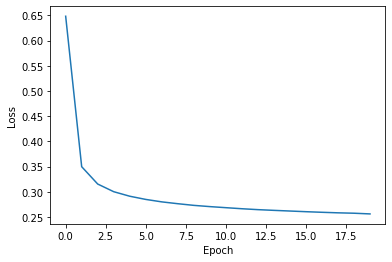

In [137]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 10 == 0: print('')
        print(f" {logs['loss']:.2f}", end='')
        

hist = model.fit(xtrain, ytrain,
                  batch_size=128,
                  epochs=20,
                  verbose=0,
                  validation_data=(xtest, ytest),
                  callbacks=[PrintDot()])

plt.plot(hist.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [142]:
score = model.evaluate(xtest, ytest, verbose=0)
score # Test loss, test accuracy

[0.26314557043462994, 0.9273]